<a href="https://colab.research.google.com/github/kimetsu23/Procesamiento_Imagenes/blob/main/Practica_Procesamiento_Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE I – ANÁLISIS CONCEPTUAL

**1. ¿Qué es un píxel y cómo se representa computacionalmente en una imagen digital?**

Un píxel es el punto más pequeño que forma una imagen digital.
Básicamente, una imagen está compuesta por miles o millones de estos puntos.

En la computadora, una imagen no es más que una matriz de números.
Cada número representa la intensidad de color o de luz en ese punto específico.

O sea, lo que vemos como una foto realmente son datos organizados en forma de matriz.

**2. Si una imagen tiene dimensiones (alto, ancho, 3), explique:**

En mi caso la imagen tiene dimensiones:

`(4451, 2787, 3)`

Eso significa:

`4451` píxeles de alto

`2787` píxeles de ancho

3 canales de color

El número 3 está ahí porque la imagen es a color.
Cada píxel tiene tres valores: rojo, verde y azul.

Cada uno guarda un número entre 0 y 255.
La combinación de esos tres valores es lo que forma el color final que vemos.

**3 ¿Qué ocurre cuando una imagen se convierte de color a escala de grises?**

**¿Se pierde información?**

Cuando la convierto a escala de grises, elimino los tres canales de color y dejo solo uno.

Ya no tengo información de rojo, verde y azul por separado.
Ahora solo tengo intensidad de luz.

Sí, se pierde información.
Se pierde el color.

La imagen pasa de ser una matriz 3D a una matriz 2D.
Es más simple, pero tiene menos información.

**4. ¿Qué significa degradar una imagen?**

Degradar una imagen es reducir su calidad o modificar sus datos originales.

Dos formas claras de degradarla:

Reducir la resolución → hay menos píxeles, por lo tanto menos detalle.

Aplicar un umbral → se eliminan los tonos intermedios y solo quedan blanco y negro.

En ambos casos se pierde información, pero se puede facilitar el análisis.

**5. Explique por qué el procesamiento de imágenes puede considerarse parte de la Ciencia de Datos**

Porque una imagen son datos numéricos.

Cuando procesamos imágenes estamos:

Transformando datos

Simplificando información

Extrayendo características

Midiendo cosas (como el porcentaje de píxeles blancos)

Eso es Ciencia de Datos.

Estamos tomando datos crudos (la imagen) y convirtiéndolos en información útil que se puede analizar o usar para tomar decisiones.

# PARTE II – PROCESAMIENTO Y ANÁLISIS EN PYTHON

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Selecionar imagen**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving bigben.jpg to bigben.jpg


# Dimensiones de la imagen

**Cargar imagen**

(np.float64(-0.5), np.float64(2786.5), np.float64(4450.5), np.float64(-0.5))

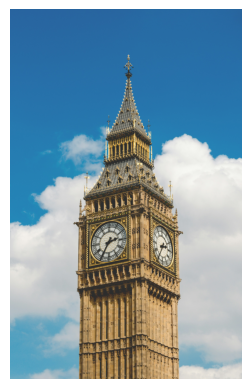

In [6]:
image = cv2.imread('bigben.jpg')

# Convertimos de BGR a RGB (OpenCV usa BGR por defecto)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')

**Mostrar dimensiones y los datos**

In [7]:
print("Dimensiones:", image.shape)
print("Tipo de dato:", image.dtype)
print("Tamaño total:", image.size)


Dimensiones: (4451, 2787, 3)
Tipo de dato: uint8
Tamaño total: 37214811


# **Dimensiones de la imagen**

Mi imagen tiene dimensiones:

`(4451, 2787, 3)`

Eso significa:

`4451` píxeles de alto

`2787` píxeles de ancho

3 canales de color `(RGB)`

Es una imagen grande y a color.
El número 3 indica que cada píxel guarda tres valores: rojo, verde y azul.

En total, la imagen tiene más de 37 millones de valores almacenados.

# ¿Qué cambió al convertirla a escala de grises?

**Convertir a escala de grises**

(np.float64(-0.5), np.float64(2786.5), np.float64(4450.5), np.float64(-0.5))

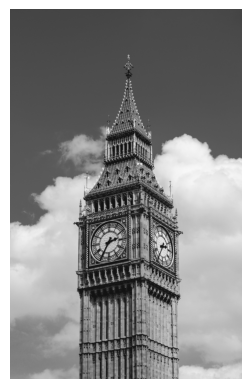

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')


# **¿Qué cambió al convertirla a escala de grises?**

Cuando convertí la imagen a escala de grises, eliminé los tres canales de color y dejé solo uno.

Desde el punto de vista de los datos:

Pasé de una matriz 3D (alto, ancho, 3)

A una matriz 2D (alto, ancho)

Ya no hay información de color, solo intensidad de luz.

Visualmente la imagen sigue siendo la misma estructura (Big Ben), pero en términos de datos ahora es más simple y ligera.

Sí se pierde información, específicamente el color.

# ¿Qué efecto tuvo la reducción de resolución?

**Reducir resolución**

(np.float64(-0.5), np.float64(1392.5), np.float64(2224.5), np.float64(-0.5))

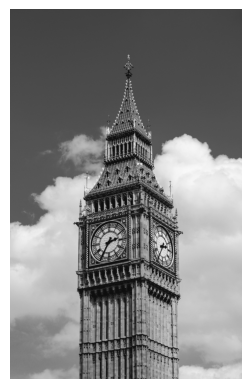

In [9]:
reduced = cv2.resize(gray, (gray.shape[1]//2, gray.shape[0]//2))

plt.imshow(reduced, cmap='gray')
plt.axis('off')


# **¿Qué efecto tuvo la reducción de resolución?**

**¿Se perdió información?**

Sí, se perdió información.

Al reducir la resolución a la mitad:

Disminuyó la cantidad de píxeles

Se redujo el nivel de detalle

Se evidencia porque la imagen se ve ligeramente menos definida al hacer zoom.

En términos de datos, hay menos valores almacenados, por lo tanto menos información visual.

Esto mejora velocidad de procesamiento, pero sacrifica precisió

# Interpretación de la segmentación (umbral)

**Segmentación (Umbral)**

(np.float64(-0.5), np.float64(2786.5), np.float64(4450.5), np.float64(-0.5))

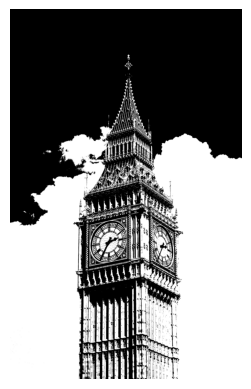

In [10]:
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(threshold, cmap='gray')
plt.axis('off')


**Detectar bordes**

(np.float64(-0.5), np.float64(2786.5), np.float64(4450.5), np.float64(-0.5))

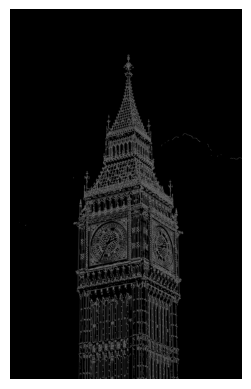

In [11]:
edges = cv2.Canny(gray, 100, 200)

plt.imshow(edges, cmap='gray')
plt.axis('off')


# **Interpretación de la segmentación (umbral)**

Cuando apliqué el umbral con valor 127:

`cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)`

Lo que hice fue dividir la imagen en dos grupos:

Píxeles oscuros → negro `(0)`

Píxeles claros → blanco `(255)`

En mi imagen, los píxeles blancos representan las zonas más iluminadas, como el cielo y partes claras de la torre.

Los píxeles negros representan las zonas más oscuras y sombras.

Esto simplifica la imagen y permite separar visualmente regiones claras de oscuras.

# Interpretación del porcentaje de píxeles blancos

**Calcular porcentaje de píxeles blancos**

In [12]:
white_pixels = np.sum(threshold == 255)
total_pixels = threshold.size

percentage_white = (white_pixels / total_pixels) * 100

print("Porcentaje de píxeles blancos:", percentage_white, "%")


Porcentaje de píxeles blancos: 46.9571993795696 %


# **Interpretación del porcentaje de píxeles blancos**

El resultado fue:

`46.95%` **de píxeles blancos**

Eso significa que aproximadamente la mitad de la imagen corresponde a zonas claras.

En este caso tiene sentido, porque gran parte de la imagen es cielo azul claro y nubes.

**¿Qué información cuantitativa puedo inferir?**

Que casi la mitad de la imagen corresponde a regiones de alta intensidad de luz.

**¿Cómo podría usarse esta métrica en un problema real?**

Este tipo de métrica podría utilizarse para:

Detectar presencia de objetos

Medir proporción de fondo vs objeto

Analizar iluminación en una escena

Determinar cobertura de cielo en imágenes exteriores

Clasificar imágenes según brillo

Es una forma simple de convertir una imagen en un valor numérico que se puede usar en análisis más avanzados.